# Time data 5s

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
time_data = pd.read_excel('data/TestKmeans.xlsx', parse_dates=True,na_values=-999.25,index_col="Date&Time")
time_data

,Bit depth (m),ROP (m/h),RPM bottom (rpm),Hook height (m),Pressure (psi),Tension (klbf),RPM bottom (rpm).1,Mud flow (l/mn),SPP (psi),RPM top (rpm),Torque (lbf.ft),ROP (m/h).1,WOB (klbf),Specific Energy (psi)
Date&Time,,,,,,,,,,,,,,
2018-09-07 04:51:50,3004.004,24.696,188.138,9.696,87.025,159.191,128.138,985.680,3239.031,60.0,4668.049,16.743,0.000,8888.263
2018-09-07 04:51:55,3004.038,24.696,188.138,9.661,97.598,158.899,128.138,985.680,3250.698,60.0,4496.047,17.971,3.675,27896.408
2018-09-07 04:52:00,3004.072,20.52,187.792,9.627,102.585,158.786,127.792,983.016,3260.523,60.0,4844.050,19.200,3.844,27706.353
2018-09-07 04:52:05,3004.101,24.696,188.138,9.599,120.923,158.745,128.138,985.680,3275.646,60.0,4712.049,20.086,3.900,25310.607
2018-09-07 04:52:10,3004.135,24.696,188.138,9.564,125.296,158.648,128.138,985.680,3280.648,60.0,4770.050,21.128,3.940,23841.389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-10 18:39:40,4353.827,0,124.560,4.591,-729.823,177.220,124.560,958.152,3350.863,0.0,0.000,0.000,0.000,2314572.119
2018-09-10 18:39:45,4353.827,0,124.306,4.591,-726.488,177.203,124.306,956.198,3352.139,0.0,0.000,0.000,0.000,2314572.119
2018-09-10 18:39:50,4353.827,0,124.675,4.591,-729.529,177.166,124.675,959.040,3352.131,0.0,0.000,0.000,0.000,2314572.119


## Data exploration

In [3]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61775 entries, 2018-09-07 04:51:50 to 2018-09-10 18:40:00
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bit depth (m)          61775 non-null  float64
 1   ROP (m/h)              61775 non-null  object 
 2   RPM bottom (rpm)       61775 non-null  float64
 3   Hook height (m)        61775 non-null  float64
 4   Pressure (psi)         61775 non-null  float64
 5   Tension (klbf)         61775 non-null  float64
 6   RPM bottom (rpm).1     61775 non-null  float64
 7   Mud flow (l/mn)        61775 non-null  float64
 8   SPP (psi)              61775 non-null  float64
 9   RPM top (rpm)          61744 non-null  float64
 10  Torque (lbf.ft)        61775 non-null  float64
 11  ROP (m/h).1            61775 non-null  float64
 12  WOB (klbf)             61775 non-null  float64
 13  Specific Energy (psi)  56496 non-null  float64
dtypes: float64(13), obj

- **type ROP**
- **null value RPM top**
- **drop Specific Energy column**
- **drop one RPM bottom**
- **drop one ROP**

In [4]:
time_data.describe()

,Bit depth (m),RPM bottom (rpm),Hook height (m),Pressure (psi),Tension (klbf),RPM bottom (rpm).1,Mud flow (l/mn),SPP (psi),RPM top (rpm),Torque (lbf.ft),ROP (m/h).1,WOB (klbf),Specific Energy (psi)
count,61775.000000,61775.000000,61775.000000,61775.000000,61775.000000,61775.000000,61775.000000,61775.000000,61744.000000,61775.000000,61775.000000,61775.000000,5.649600e+04
mean,3640.838004,190.613699,15.663591,-96.321499,153.852774,124.093536,954.575548,3426.523610,66.781418,3755.765537,16.059117,9.224302,2.013807e+05
std,394.694172,70.142444,9.645997,1026.952981,27.831910,38.464432,295.850542,1089.731616,44.375702,2564.681444,13.682759,7.467072,7.086563e+05
min,2984.340000,0.000000,0.307000,-4003.585000,46.599000,0.000000,0.000000,49.696000,-339.700000,-999.260000,0.000000,0.000000,0.000000e+00
25%,3268.258500,156.713000,7.109000,57.699000,152.360000,129.524000,996.336000,3469.330500,18.000000,978.010000,0.000000,0.000000,2.476549e+04
50%,3588.393000,219.870000,15.974000,173.558000,159.381000,136.104000,1046.952000,3778.652000,90.000000,4560.047000,15.100000,10.359000,3.324376e+04
75%,3970.738000,246.104000,23.681500,250.977000,164.191000,143.030000,1100.232000,4005.649000,110.000000,6130.064000,29.565000,13.164000,4.268922e+04
max,4354.642000,263.723000,32.079000,4010.624000,258.959000,145.108000,1113.552000,4501.798000,120.000000,20234.210000,55.975000,45.265000,6.995028e+06


## Data transformation

In [5]:
clean_data = time_data.copy()

### Drop Specific Energy

In [6]:
clean_data.drop(["Specific Energy (psi)"],axis=1,inplace=True)
clean_data

,Bit depth (m),ROP (m/h),RPM bottom (rpm),Hook height (m),Pressure (psi),Tension (klbf),RPM bottom (rpm).1,Mud flow (l/mn),SPP (psi),RPM top (rpm),Torque (lbf.ft),ROP (m/h).1,WOB (klbf)
Date&Time,,,,,,,,,,,,,
2018-09-07 04:51:50,3004.004,24.696,188.138,9.696,87.025,159.191,128.138,985.680,3239.031,60.0,4668.049,16.743,0.000
2018-09-07 04:51:55,3004.038,24.696,188.138,9.661,97.598,158.899,128.138,985.680,3250.698,60.0,4496.047,17.971,3.675
2018-09-07 04:52:00,3004.072,20.52,187.792,9.627,102.585,158.786,127.792,983.016,3260.523,60.0,4844.050,19.200,3.844
2018-09-07 04:52:05,3004.101,24.696,188.138,9.599,120.923,158.745,128.138,985.680,3275.646,60.0,4712.049,20.086,3.900
2018-09-07 04:52:10,3004.135,24.696,188.138,9.564,125.296,158.648,128.138,985.680,3280.648,60.0,4770.050,21.128,3.940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-10 18:39:40,4353.827,0,124.560,4.591,-729.823,177.220,124.560,958.152,3350.863,0.0,0.000,0.000,0.000
2018-09-10 18:39:45,4353.827,0,124.306,4.591,-726.488,177.203,124.306,956.198,3352.139,0.0,0.000,0.000,0.000
2018-09-10 18:39:50,4353.827,0,124.675,4.591,-729.529,177.166,124.675,959.040,3352.131,0.0,0.000,0.000,0.000


### Type ROP (m/h)

In [7]:
clean_data["ROP (m/h)"]==(' ')

Date&Time
2018-09-07 04:51:50    False
2018-09-07 04:51:55    False
2018-09-07 04:52:00    False
2018-09-07 04:52:05    False
2018-09-07 04:52:10    False
                       ...  
2018-09-10 18:39:40    False
2018-09-10 18:39:45    False
2018-09-10 18:39:50    False
2018-09-10 18:39:55    False
2018-09-10 18:40:00     True
Name: ROP (m/h), Length: 61775, dtype: bool

In [8]:
clean_data.at["2018-09-10 18:40:00","ROP (m/h)"]=0

In [9]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61775 entries, 2018-09-07 04:51:50 to 2018-09-10 18:40:00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bit depth (m)       61775 non-null  float64
 1   ROP (m/h)           61775 non-null  object 
 2   RPM bottom (rpm)    61775 non-null  float64
 3   Hook height (m)     61775 non-null  float64
 4   Pressure (psi)      61775 non-null  float64
 5   Tension (klbf)      61775 non-null  float64
 6   RPM bottom (rpm).1  61775 non-null  float64
 7   Mud flow (l/mn)     61775 non-null  float64
 8   SPP (psi)           61775 non-null  float64
 9   RPM top (rpm)       61744 non-null  float64
 10  Torque (lbf.ft)     61775 non-null  float64
 11  ROP (m/h).1         61775 non-null  float64
 12  WOB (klbf)          61775 non-null  float64
dtypes: float64(12), object(1)
memory usage: 9.1+ MB


In [10]:
clean_data["ROP (m/h)"] = clean_data["ROP (m/h)"].astype('float64')

In [11]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61775 entries, 2018-09-07 04:51:50 to 2018-09-10 18:40:00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bit depth (m)       61775 non-null  float64
 1   ROP (m/h)           61775 non-null  float64
 2   RPM bottom (rpm)    61775 non-null  float64
 3   Hook height (m)     61775 non-null  float64
 4   Pressure (psi)      61775 non-null  float64
 5   Tension (klbf)      61775 non-null  float64
 6   RPM bottom (rpm).1  61775 non-null  float64
 7   Mud flow (l/mn)     61775 non-null  float64
 8   SPP (psi)           61775 non-null  float64
 9   RPM top (rpm)       61744 non-null  float64
 10  Torque (lbf.ft)     61775 non-null  float64
 11  ROP (m/h).1         61775 non-null  float64
 12  WOB (klbf)          61775 non-null  float64
dtypes: float64(13)
memory usage: 9.1 MB


### NaN RPM top

In [12]:
clean_data.isnull().sum()

Bit depth (m)          0
ROP (m/h)              0
RPM bottom (rpm)       0
Hook height (m)        0
Pressure (psi)         0
Tension (klbf)         0
RPM bottom (rpm).1     0
Mud flow (l/mn)        0
SPP (psi)              0
RPM top (rpm)         31
Torque (lbf.ft)        0
ROP (m/h).1            0
WOB (klbf)             0
dtype: int64

In [13]:
clean_data[clean_data.isna().any(axis=1)]

,Bit depth (m),ROP (m/h),RPM bottom (rpm),Hook height (m),Pressure (psi),Tension (klbf),RPM bottom (rpm).1,Mud flow (l/mn),SPP (psi),RPM top (rpm),Torque (lbf.ft),ROP (m/h).1,WOB (klbf)
Date&Time,,,,,,,,,,,,,
2018-09-09 07:00:40,3760.746,0.0,129.524,2.032,124.529,180.382,129.524,996.336,3411.564,NaN,-999.26,0.0,0.0
2018-09-09 07:00:45,3760.746,0.0,129.177,2.032,100.437,180.265,129.177,993.672,3388.079,NaN,-999.26,0.0,0.0
2018-09-09 07:00:50,3760.746,0.0,129.524,2.032,78.416,180.340,129.524,996.336,3369.240,NaN,-999.26,0.0,0.0
2018-09-09 07:00:55,3760.746,0.0,129.524,2.032,63.224,180.415,129.524,993.672,3354.207,NaN,-999.26,0.0,0.0
2018-09-09 07:01:00,3760.746,0.0,129.177,2.032,52.252,180.475,129.177,993.672,3344.594,NaN,-999.26,0.0,0.0
2018-09-09 07:01:05,3760.746,0.0,129.177,2.032,47.725,180.522,129.177,996.336,3338.210,NaN,-999.26,0.0,0.0
2018-09-09 07:01:10,3760.746,0.0,129.177,2.032,44.349,180.564,129.177,993.672,3331.011,NaN,-999.26,0.0,0.0
2018-09-09 07:01:15,3760.746,0.0,129.177,2.032,34.527,180.566,129.177,991.008,3323.128,NaN,-999.26,0.0,0.0
2018-09-09 07:01:20,3760.746,0.0,129.177,2.032,29.233,180.634,129.177,993.672,3317.391,NaN,-999.26,0.0,0.0


In [14]:
clean_data.replace(to_replace=-999.26, value=np.nan, inplace=True) 

In [15]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61775 entries, 2018-09-07 04:51:50 to 2018-09-10 18:40:00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bit depth (m)       61775 non-null  float64
 1   ROP (m/h)           61775 non-null  float64
 2   RPM bottom (rpm)    61775 non-null  float64
 3   Hook height (m)     61775 non-null  float64
 4   Pressure (psi)      61775 non-null  float64
 5   Tension (klbf)      61775 non-null  float64
 6   RPM bottom (rpm).1  61775 non-null  float64
 7   Mud flow (l/mn)     61775 non-null  float64
 8   SPP (psi)           61775 non-null  float64
 9   RPM top (rpm)       61744 non-null  float64
 10  Torque (lbf.ft)     61744 non-null  float64
 11  ROP (m/h).1         61775 non-null  float64
 12  WOB (klbf)          61775 non-null  float64
dtypes: float64(13)
memory usage: 9.1 MB


In [16]:
clean_data[clean_data.isna().any(axis=1)]

,Bit depth (m),ROP (m/h),RPM bottom (rpm),Hook height (m),Pressure (psi),Tension (klbf),RPM bottom (rpm).1,Mud flow (l/mn),SPP (psi),RPM top (rpm),Torque (lbf.ft),ROP (m/h).1,WOB (klbf)
Date&Time,,,,,,,,,,,,,
2018-09-09 07:00:40,3760.746,0.0,129.524,2.032,124.529,180.382,129.524,996.336,3411.564,NaN,NaN,0.0,0.0
2018-09-09 07:00:45,3760.746,0.0,129.177,2.032,100.437,180.265,129.177,993.672,3388.079,NaN,NaN,0.0,0.0
2018-09-09 07:00:50,3760.746,0.0,129.524,2.032,78.416,180.340,129.524,996.336,3369.240,NaN,NaN,0.0,0.0
2018-09-09 07:00:55,3760.746,0.0,129.524,2.032,63.224,180.415,129.524,993.672,3354.207,NaN,NaN,0.0,0.0
2018-09-09 07:01:00,3760.746,0.0,129.177,2.032,52.252,180.475,129.177,993.672,3344.594,NaN,NaN,0.0,0.0
2018-09-09 07:01:05,3760.746,0.0,129.177,2.032,47.725,180.522,129.177,996.336,3338.210,NaN,NaN,0.0,0.0
2018-09-09 07:01:10,3760.746,0.0,129.177,2.032,44.349,180.564,129.177,993.672,3331.011,NaN,NaN,0.0,0.0
2018-09-09 07:01:15,3760.746,0.0,129.177,2.032,34.527,180.566,129.177,991.008,3323.128,NaN,NaN,0.0,0.0
2018-09-09 07:01:20,3760.746,0.0,129.177,2.032,29.233,180.634,129.177,993.672,3317.391,NaN,NaN,0.0,0.0


In [17]:
clean_data.interpolate(inplace=True)

In [18]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61775 entries, 2018-09-07 04:51:50 to 2018-09-10 18:40:00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bit depth (m)       61775 non-null  float64
 1   ROP (m/h)           61775 non-null  float64
 2   RPM bottom (rpm)    61775 non-null  float64
 3   Hook height (m)     61775 non-null  float64
 4   Pressure (psi)      61775 non-null  float64
 5   Tension (klbf)      61775 non-null  float64
 6   RPM bottom (rpm).1  61775 non-null  float64
 7   Mud flow (l/mn)     61775 non-null  float64
 8   SPP (psi)           61775 non-null  float64
 9   RPM top (rpm)       61775 non-null  float64
 10  Torque (lbf.ft)     61775 non-null  float64
 11  ROP (m/h).1         61775 non-null  float64
 12  WOB (klbf)          61775 non-null  float64
dtypes: float64(13)
memory usage: 9.1 MB


In [19]:
clean_data[clean_data["RPM top (rpm)"]<0]

,Bit depth (m),ROP (m/h),RPM bottom (rpm),Hook height (m),Pressure (psi),Tension (klbf),RPM bottom (rpm).1,Mud flow (l/mn),SPP (psi),RPM top (rpm),Torque (lbf.ft),ROP (m/h).1,WOB (klbf)
Date&Time,,,,,,,,,,,,,
2018-09-09 07:00:35,3760.746,0.000,217.177,2.032,140.028,180.132,129.177,993.672,3432.068,-333.700000,2906.330000,0.000,0.000
2018-09-09 07:00:40,3760.746,0.000,129.524,2.032,124.529,180.382,129.524,996.336,3411.564,-323.271875,2815.507187,0.000,0.000
2018-09-09 07:00:45,3760.746,0.000,129.177,2.032,100.437,180.265,129.177,993.672,3388.079,-312.843750,2724.684375,0.000,0.000
2018-09-09 07:00:50,3760.746,0.000,129.524,2.032,78.416,180.340,129.524,996.336,3369.240,-302.415625,2633.861562,0.000,0.000
2018-09-09 07:00:55,3760.746,0.000,129.524,2.032,63.224,180.415,129.524,993.672,3354.207,-291.987500,2543.038750,0.000,0.000
2018-09-09 07:01:00,3760.746,0.000,129.177,2.032,52.252,180.475,129.177,993.672,3344.594,-281.559375,2452.215938,0.000,0.000
2018-09-09 07:01:05,3760.746,0.000,129.177,2.032,47.725,180.522,129.177,996.336,3338.210,-271.131250,2361.393125,0.000,0.000
2018-09-09 07:01:10,3760.746,0.000,129.177,2.032,44.349,180.564,129.177,993.672,3331.011,-260.703125,2270.570312,0.000,0.000
2018-09-09 07:01:15,3760.746,0.000,129.177,2.032,34.527,180.566,129.177,991.008,3323.128,-250.275000,2179.747500,0.000,0.000


In [20]:
def RPM(x):
    if x<0:
        x=0
        return x
    else:
        return x

In [21]:
clean_data["RPM top (rpm)"] = clean_data["RPM top (rpm)"].apply(RPM)

### Duplicated columns  ROP & RPM bottom

First ROP column is the derived bit depth => needs to be dropped

In [22]:
clean_data.drop(["ROP (m/h)"],axis=1,inplace=True)

First RPM bottom is Total RPM and second is motor RPM

Rename columns

In [23]:
list(clean_data.columns)

['Bit depth (m)',
 'RPM bottom (rpm)',
 'Hook height (m)',
 'Pressure (psi)',
 'Tension (klbf)',
 'RPM bottom (rpm).1',
 'Mud flow (l/mn)',
 'SPP (psi)',
 'RPM top (rpm)',
 'Torque (lbf.ft)',
 'ROP (m/h).1',
 'WOB (klbf)']

In [24]:
df_columns = ['Bit depth (m)',
 'Total RPM',
 'Hook height (m)',
 'Pressure (psi)',
 'Tension (klbf)',
 'Motor RPM',
 'Mud flow (l/mn)',
 'SPP (psi)',
 'RPM top (rpm)',
 'Torque (lbf.ft)',
 'ROP (m/h)',
 'WOB (klbf)']

In [25]:
clean_data.columns=df_columns

In [26]:
clean_data.columns

Index(['Bit depth (m)', 'Total RPM', 'Hook height (m)', 'Pressure (psi)',
       'Tension (klbf)', 'Motor RPM', 'Mud flow (l/mn)', 'SPP (psi)',
       'RPM top (rpm)', 'Torque (lbf.ft)', 'ROP (m/h)', 'WOB (klbf)'],
      dtype='object')

In [37]:
clean_data

,Bit depth (m),Total RPM,Hook height (m),Pressure (psi),Tension (klbf),Motor RPM,Mud flow (l/mn),SPP (psi),RPM top (rpm),Torque (lbf.ft),ROP (m/h),WOB (klbf)
Date&Time,,,,,,,,,,,,
2018-09-07 04:51:50,3004.004,188.138,9.696,87.025,159.191,128.138,985.680,3239.031,60.0,4668.049,16.743,0.000
2018-09-07 04:51:55,3004.038,188.138,9.661,97.598,158.899,128.138,985.680,3250.698,60.0,4496.047,17.971,3.675
2018-09-07 04:52:00,3004.072,187.792,9.627,102.585,158.786,127.792,983.016,3260.523,60.0,4844.050,19.200,3.844
2018-09-07 04:52:05,3004.101,188.138,9.599,120.923,158.745,128.138,985.680,3275.646,60.0,4712.049,20.086,3.900
2018-09-07 04:52:10,3004.135,188.138,9.564,125.296,158.648,128.138,985.680,3280.648,60.0,4770.050,21.128,3.940
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-10 18:39:40,4353.827,124.560,4.591,-729.823,177.220,124.560,958.152,3350.863,0.0,0.000,0.000,0.000
2018-09-10 18:39:45,4353.827,124.306,4.591,-726.488,177.203,124.306,956.198,3352.139,0.0,0.000,0.000,0.000
2018-09-10 18:39:50,4353.827,124.675,4.591,-729.529,177.166,124.675,959.040,3352.131,0.0,0.000,0.000,0.000


In [38]:
fig,ax = plt.subplots(12,1,sharex=True,figsize=(16,20))

for i in range(len(list(clean_data.columns))):
    ax[i].plot(clean_data[list(clean_data.columns)[i]])
    ax[i].set_ylabel(list(clean_data.columns)[i])

plt.show()

Using matplotlib backend: MacOSX


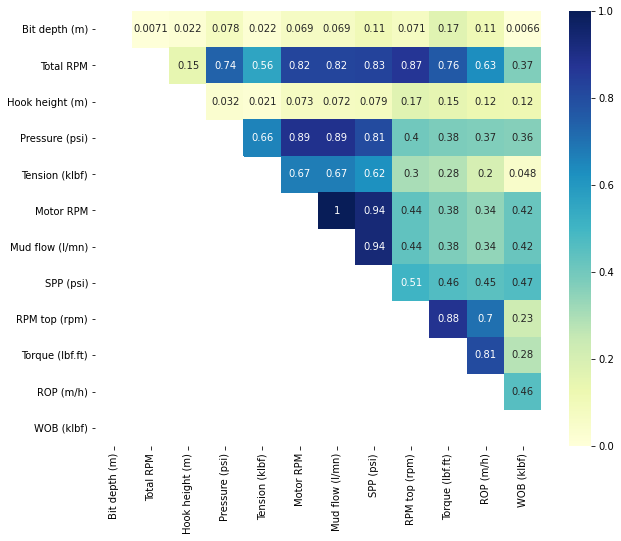

In [29]:
upper = clean_data.corr().abs().where(np.triu(np.ones(clean_data.corr().abs().shape),k=1).astype(bool))
plt.figure(figsize=(10,8))
sns.heatmap(upper,annot=True,cmap="YlGnBu",vmin=0,vmax=1)
plt.show()

In [30]:
from sklearn.cluster import KMeans

X=clean_data[["WOB (klbf)","ROP (m/h)"]]

inertia = []
K_range = range (1,20)

for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

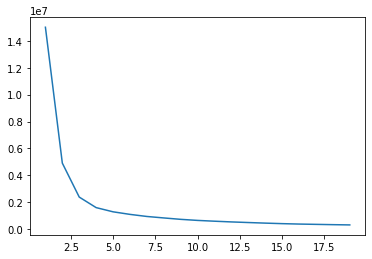

In [31]:
plt.plot(K_range,inertia)
plt.show()

**Optimum number is 3-4 clusters**

In [32]:
n_cluster = 3

model = KMeans(n_clusters=n_cluster).fit(X)
model.predict(X)

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

In [33]:
df = X[model.predict(X)==2]
df

,WOB (klbf),ROP (m/h)
Date&Time,,
2018-09-07 06:00:25,14.965,19.641
2018-09-07 06:00:30,14.185,17.222
2018-09-07 06:00:35,13.735,14.802
2018-09-07 06:00:40,13.027,12.383
2018-09-07 06:00:45,12.344,9.964
...,...,...
2018-09-10 18:12:35,7.359,17.534
2018-09-10 18:12:40,6.925,15.815
2018-09-10 18:12:45,6.282,14.096


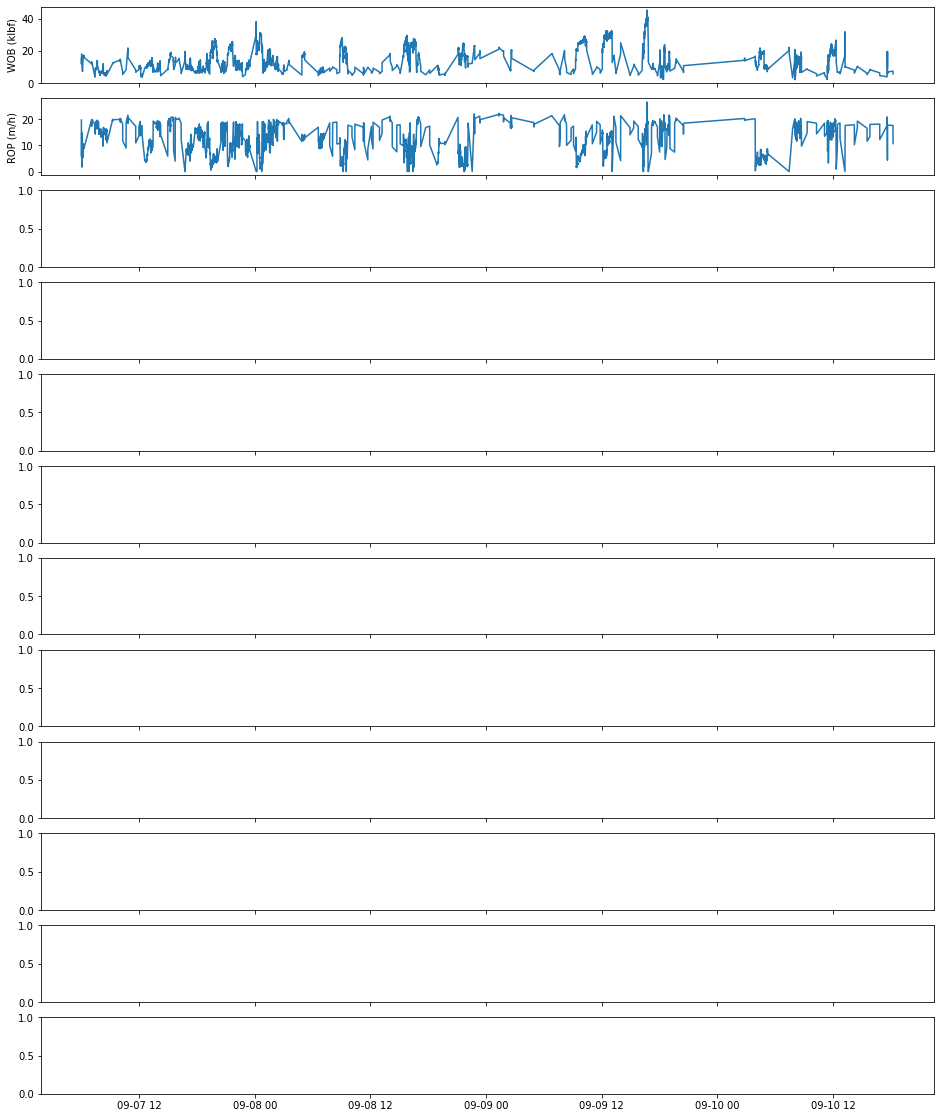

In [34]:
fig,ax = plt.subplots(12,1,sharex=True,figsize=(16,20))

for i in range(len(list(df.columns))):
    ax[i].plot(df[list(df.columns)[i]])
    ax[i].set_ylabel(list(df.columns)[i])

plt.show()

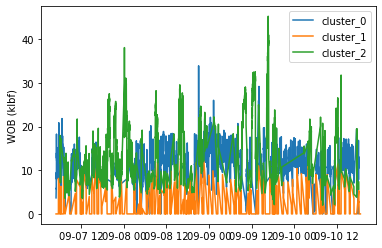

In [35]:
for k in range(n_cluster):
    df = X[model.predict(X)==k]
    plt.plot(df["WOB (klbf)"])
    plt.ylabel("WOB (klbf)")
    plt.legend([f'cluster_{i}' for i in range(n_cluster)])
plt.show()

In [36]:
for k in range(n_cluster):
    df = X[model.predict(X)==k]
    plt.plot(df["Bit depth (m)"],df["ROP (m/h)"])
    plt.ylabel("ROP (m/h)")
    plt.legend([f'cluster_{i}' for i in range(n_cluster)])
plt.show()

KeyError: 'Bit depth (m)'

In [ ]:
for k in range(n_cluster):
    df = X[model.predict(X)==k]
    plt.plot(df["Bit depth (m)"],df["SPP (psi)"])
    plt.ylabel("SPP (psi)")
    plt.legend([f'cluster_{i}' for i in range(n_cluster)])
plt.show()

In [ ]:
ax = plt.axes(projection = '3d')
ax.scatter(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c=model.predict(X))
plt.show()

In [ ]:
%matplotlib

fig,ax = plt.subplots(len(X.columns),1,sharex=True,figsize=(16,20))

for k in range(n_cluster):
    df = X[model.predict(X)==k]
    for i in range(len(list(df.columns))):
        ax[i].plot(df[list(df.columns)[i]])
        ax[i].set_ylabel(list(df.columns)[i])
        
        
plt.show()

In [ ]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=model.predict(X))
plt.xlabel("WOB")
plt.ylabel("ROP")
plt.legend([f'cluster_{i}' for i in range(n_cluster)])
plt.show()